In [236]:
from ast import increment_lineno
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
from PIL import Image
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
from keras.regularizers import l2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [170]:
os.chdir(r"C:\Users\VIJAY\Desktop\vscode\SwedishLeafDataset")
if os.path.isdir('train') is False:
    os.makedirs('train')
    os.makedirs('train/Ulmus_carpinifolia')
    os.makedirs('train/Acer')
    os.makedirs('train/Salix_aurita')
    os.makedirs('train/Quercus')
    os.makedirs('train/Alnus_incana')
    os.makedirs('train/Betula_pubescens')
    os.makedirs('train/Salix_alba')
    os.makedirs('train/Populus_tremula')
    os.makedirs('train/Ulmus_glabra')
    os.makedirs('train/Sorbus_aucuparia')
    os.makedirs('train/Salix_sinerea')
    os.makedirs('train/Populus')
    os.makedirs('train/Tilia')
    os.makedirs('train/Sorbus_intermedia')
    os.makedirs('train/Fagus_silvatica')

    os.makedirs('valid')
    os.makedirs('valid/Ulmus_carpinifolia')
    os.makedirs('valid/Acer')
    os.makedirs('valid/Salix_aurita')
    os.makedirs('valid/Quercus')
    os.makedirs('valid/Alnus_incana')
    os.makedirs('valid/Betula_pubescens')
    os.makedirs('valid/Salix_alba')
    os.makedirs('valid/Populus_tremula')
    os.makedirs('valid/Ulmus_glabra')
    os.makedirs('valid/Sorbus_aucuparia')
    os.makedirs('valid/Salix_sinerea')
    os.makedirs('valid/Populus')
    os.makedirs('valid/Tilia')
    os.makedirs('valid/Sorbus_intermedia')
    os.makedirs('valid/Fagus_silvatica')

    os.makedirs('test')
    os.makedirs('test/Ulmus_carpinifolia')
    os.makedirs('test/Acer')
    os.makedirs('test/Salix_aurita')
    os.makedirs('test/Quercus')
    os.makedirs('test/Alnus_incana')
    os.makedirs('test/Betula_pubescens')
    os.makedirs('test/Salix_alba')
    os.makedirs('test/Populus_tremula')
    os.makedirs('test/Ulmus_glabra')
    os.makedirs('test/Sorbus_aucuparia')
    os.makedirs('test/Salix_sinerea')
    os.makedirs('test/Populus')
    os.makedirs('test/Tilia')
    os.makedirs('test/Sorbus_intermedia')
    os.makedirs('test/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 60):
        shutil.move(c, 'train/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 60):
        shutil.move(c, 'train/Acer')
    for c in random.sample(glob.glob('l3nr*'), 60):
        shutil.move(c, 'train/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 60):
        shutil.move(c, 'train/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 60):
        shutil.move(c, 'train/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 60):
        shutil.move(c, 'train/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 60):
        shutil.move(c, 'train/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 60):
        shutil.move(c, 'train/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 60):
        shutil.move(c, 'train/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 60):
        shutil.move(c, 'train/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 60):
        shutil.move(c, 'train/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 60):
        shutil.move(c, 'train/Populus')
    for c in random.sample(glob.glob('l13nr*'), 60):
        shutil.move(c, 'train/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 60):
        shutil.move(c, 'train/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 60):
        shutil.move(c, 'train/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 10):
        shutil.move(c, 'valid/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 10):
        shutil.move(c, 'valid/Acer')
    for c in random.sample(glob.glob('l3nr*'), 10):
        shutil.move(c, 'valid/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 10):
        shutil.move(c, 'valid/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 10):
        shutil.move(c, 'valid/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 10):
        shutil.move(c, 'valid/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 10):
        shutil.move(c, 'valid/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 10):
        shutil.move(c, 'valid/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 10):
        shutil.move(c, 'valid/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 10):
        shutil.move(c, 'valid/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 10):
        shutil.move(c, 'valid/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 10):
        shutil.move(c, 'valid/Populus')
    for c in random.sample(glob.glob('l13nr*'), 10):
        shutil.move(c, 'valid/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 10):
        shutil.move(c, 'valid/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 10):
        shutil.move(c, 'valid/Fagus_silvatica')
    
    for c in random.sample(glob.glob('l1nr*'), 5):
        shutil.move(c, 'test/Ulmus_carpinifolia')
    for c in random.sample(glob.glob('l2nr*'), 5):
        shutil.move(c, 'test/Acer')
    for c in random.sample(glob.glob('l3nr*'), 5):
        shutil.move(c, 'test/Salix_aurita')
    for c in random.sample(glob.glob('l4nr*'), 5):
        shutil.move(c, 'test/Quercus')
    for c in random.sample(glob.glob('l5nr*'), 5):
        shutil.move(c, 'test/Alnus_incana')
    for c in random.sample(glob.glob('l6nr*'), 5):
        shutil.move(c, 'test/Betula_pubescens')
    for c in random.sample(glob.glob('l7nr*'), 5):
        shutil.move(c, 'test/Salix_alba')
    for c in random.sample(glob.glob('l8nr*'), 5):
        shutil.move(c, 'test/Populus_tremula')
    for c in random.sample(glob.glob('l9nr*'), 5):
        shutil.move(c, 'test/Ulmus_glabra')
    for c in random.sample(glob.glob('l10nr*'), 5):
        shutil.move(c, 'test/Sorbus_aucuparia')
    for c in random.sample(glob.glob('l11nr*'), 5):
        shutil.move(c, 'test/Salix_sinerea')
    for c in random.sample(glob.glob('l12nr*'), 5):
        shutil.move(c, 'test/Populus')
    for c in random.sample(glob.glob('l13nr*'), 5):
        shutil.move(c, 'test/Tilia')
    for c in random.sample(glob.glob('l14nr*'), 5):
        shutil.move(c, 'test/Sorbus_intermedia')
    for c in random.sample(glob.glob('l15nr*'), 5):
        shutil.move(c, 'test/Fagus_silvatica')

In [ ]:
base_dir = r"C:\Users\VIJAY\Desktop\vscode"

# Output directory for resized images
output_dir = r"C:\Users\VIJAY\Desktop\vscode\resized_dataset"

# Define the target size
target_size = (400, 400)

# Create the output directory if it doesn't exist
if not os.path exists(output_dir):
    os.makedirs(output_dir)

# Iterate through train, test, and valid sets
for set_name in ['train', 'test', 'valid']:
    set_dir = os.path.join(base_dir, 'SwedishLeafDataset', set_name)
    output_set_dir = os.path.join(output_dir, set_name)

    # Create the output set directory if it doesn't exist
    if not os.path.exists(output_set_dir):
        os.makedirs(output_set_dir)

    # Iterate through 15 subfolders within each set
    for class_folder in os.listdir(set_dir):
        class_dir = os.path.join(set_dir, class_folder)
        output_class_dir = os.path.join(output_set_dir, class_folder)

        # Create the output class directory if it doesn't exist
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)

        # Iterate through images in the current class folder
        for image_name in os.listdir(class_dir):
            if image_name.endswith('.tif'):
                # Read the original TIFF image
                image_path = os.path.join(class_dir, image_name)
                image = Image.open(image_path)

                # Resize the image without specifying a resampling filter (uses default)
                resized_image = image.resize(target_size)

                # Determine the output path for the resized image
                output_path = os.path.join(output_class_dir, image_name)

                # Save the resized image to the output directory
                resized_image.save(output_path)

print("Resizing complete.")

In [237]:
train_path = r"C:\Users\VIJAY\Desktop\vscode\SwedishLeafDataset_Resized\train"
valid_path = r"C:\Users\VIJAY\Desktop\vscode\SwedishLeafDataset_Resized\valid"
test_path = r"C:\Users\VIJAY\Desktop\vscode\SwedishLeafDataset_Resized\test"

In [238]:
species = ['Ulmus_carpinifolia', 'Acer', 'Salix_aurita', 'Quercus', 'Alnus_incana', 'Betula_pubescens', 'Salix_alba', 'Populus_tremula', 'Ulmus_glabra', 'Sorbus_aucuparia', 'Salix_sinerea', 'Populus', 'Tilia', 'Sorbus_intermedia', 'Fagus_silvatica']

In [239]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # You can add this for filling in empty pixels after transformations
)
train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    classes=species,
    batch_size=5
)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=species, batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224, 224), classes=species, batch_size=5, shuffle=False)

Found 900 images belonging to 15 classes.


Found 150 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


In [240]:
assert train_batches.n == 900
assert valid_batches.n == 150
assert test_batches.n == 75

In [241]:
imgs, labels = next(train_batches)

In [242]:
def plotImage(images_arr):
    fig, axes = plt.subplots(5, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


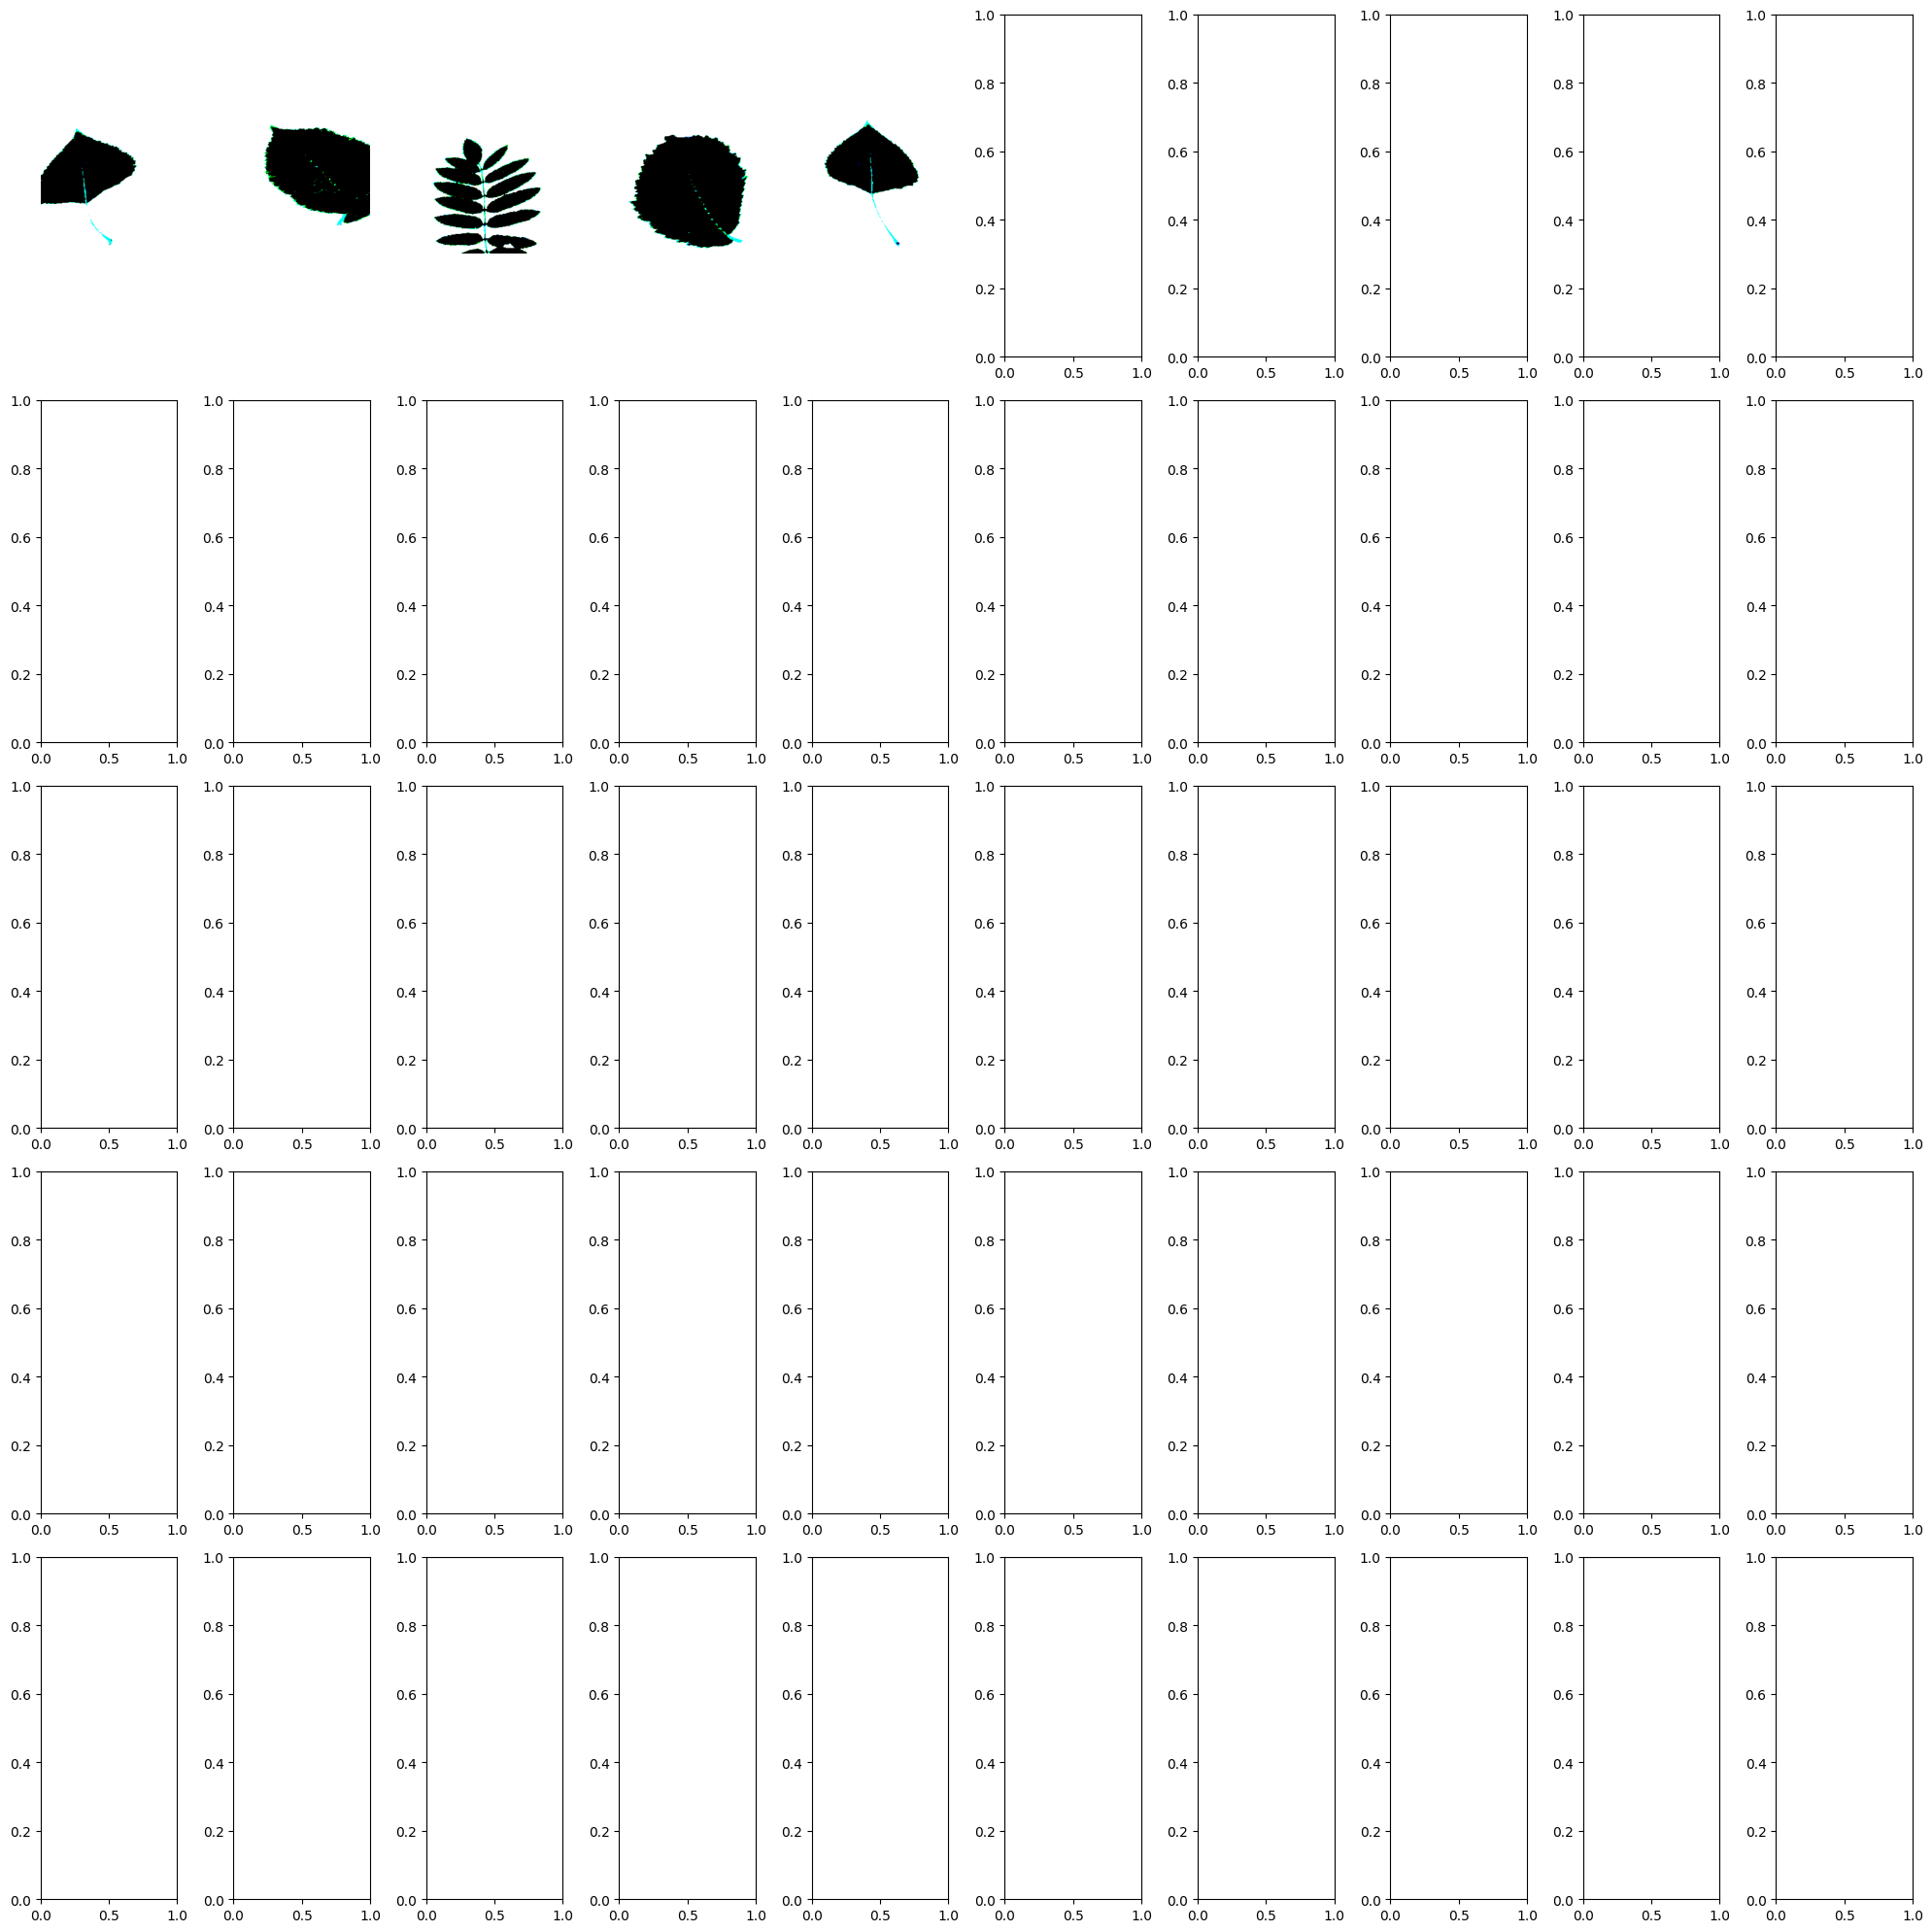

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [243]:
plotImage(imgs)
print(labels)

In [244]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(units=15, activation='softmax')
])
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))

In [245]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 26, 26, 128)     

In [246]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [247]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose=2)


Epoch 1/50
180/180 - 59s - loss: 4.0794 - accuracy: 0.2000 - val_loss: 1.7739 - val_accuracy: 0.4000 - 59s/epoch - 326ms/step
Epoch 2/50
180/180 - 61s - loss: 1.8224 - accuracy: 0.3933 - val_loss: 1.2987 - val_accuracy: 0.5600 - 61s/epoch - 337ms/step
Epoch 3/50
180/180 - 61s - loss: 1.4410 - accuracy: 0.5033 - val_loss: 1.0125 - val_accuracy: 0.5933 - 61s/epoch - 336ms/step
Epoch 4/50
180/180 - 60s - loss: 1.3022 - accuracy: 0.5467 - val_loss: 0.8887 - val_accuracy: 0.7467 - 60s/epoch - 336ms/step
Epoch 5/50
180/180 - 61s - loss: 1.1035 - accuracy: 0.6133 - val_loss: 0.7017 - val_accuracy: 0.7600 - 61s/epoch - 338ms/step
Epoch 6/50
180/180 - 62s - loss: 0.9394 - accuracy: 0.6700 - val_loss: 0.8619 - val_accuracy: 0.6600 - 62s/epoch - 342ms/step
Epoch 7/50
180/180 - 57s - loss: 0.9174 - accuracy: 0.6778 - val_loss: 0.6231 - val_accuracy: 0.7467 - 57s/epoch - 317ms/step
Epoch 8/50
180/180 - 57s - loss: 0.8140 - accuracy: 0.7133 - val_loss: 0.5284 - val_accuracy: 0.7800 - 57s/epoch - 314

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


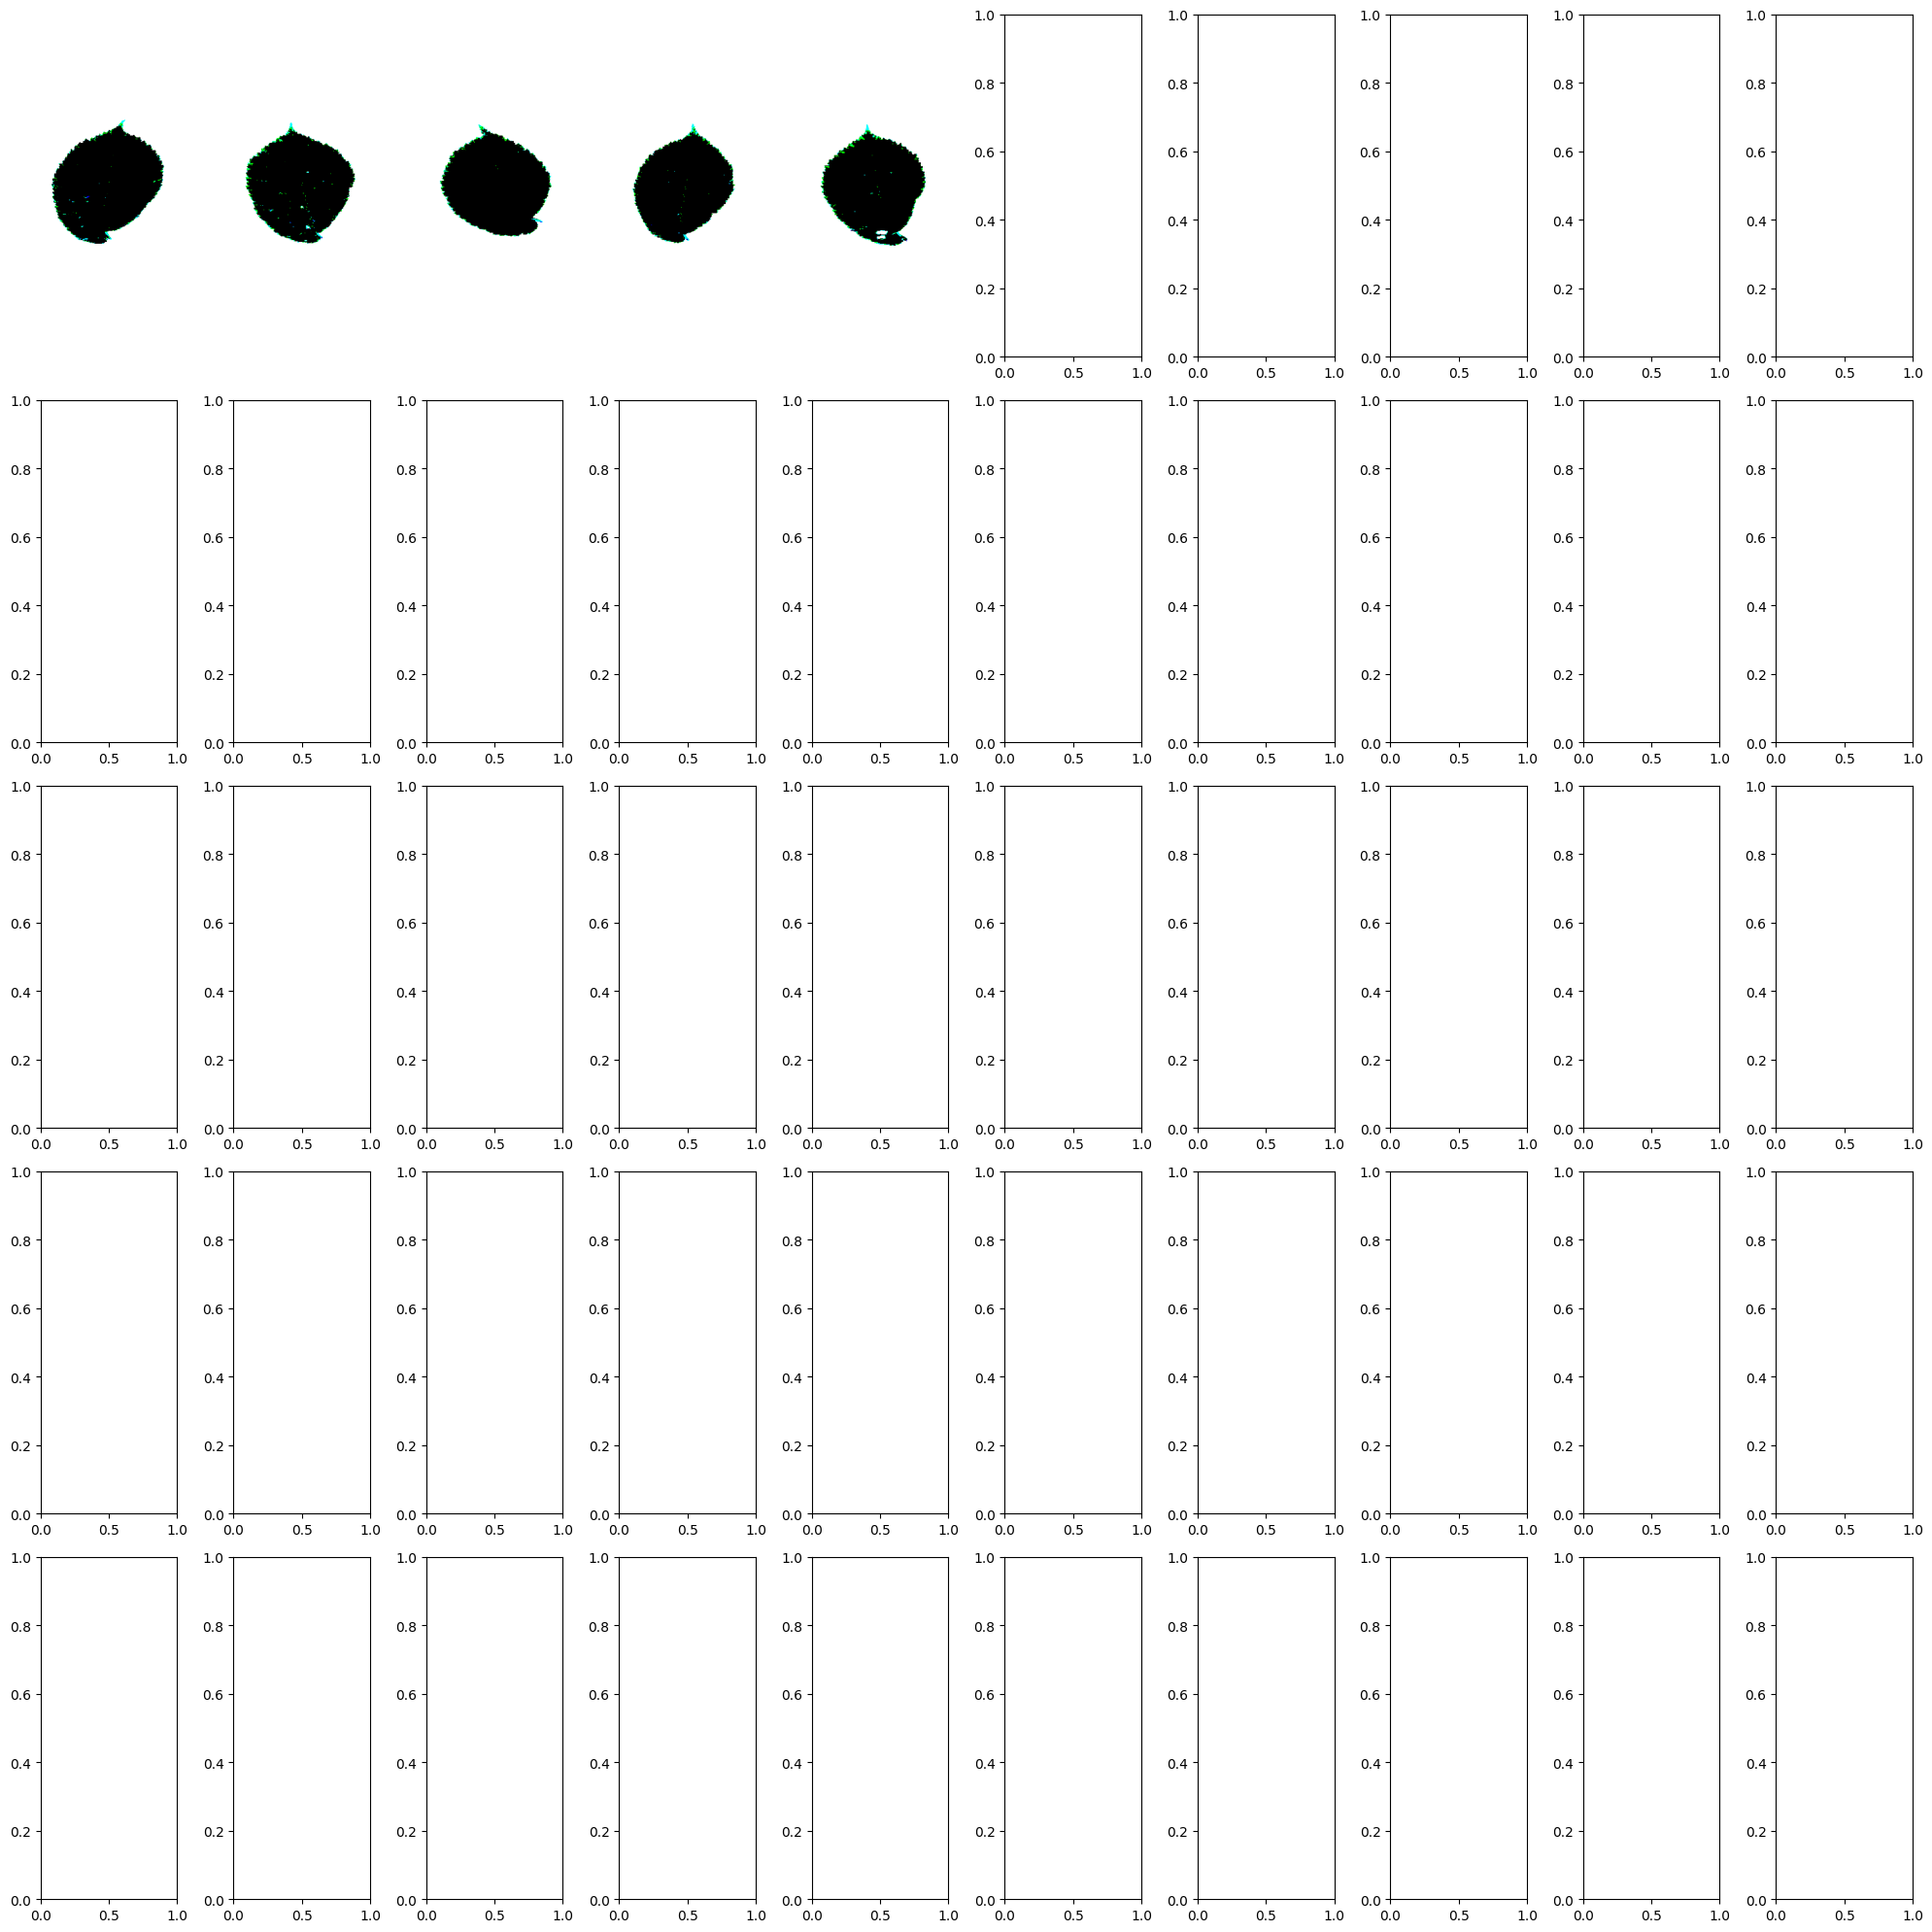

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [248]:
test_imgs, test_labels = next(test_batches)
plotImage(test_imgs)
print(test_labels)

In [249]:
test_batches.classes

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14])

In [250]:
predictions = model.predict(x=test_batches, verbose=0)
predictions

array([[9.96436477e-01, 1.95790745e-10, 1.61405296e-05, ...,
        4.23305011e-12, 7.66585117e-07, 1.14124532e-09],
       [9.97309923e-01, 5.67662202e-11, 3.34559409e-05, ...,
        3.99905993e-13, 1.01479673e-05, 6.18681009e-11],
       [7.94773817e-01, 4.61006266e-06, 5.28321601e-03, ...,
        5.05228606e-08, 5.96553182e-05, 1.76160569e-07],
       ...,
       [4.66776889e-20, 3.14636137e-25, 1.39055651e-23, ...,
        2.70494466e-14, 1.57238996e-11, 1.00000000e+00],
       [1.74552154e-21, 1.23370486e-23, 1.49894730e-21, ...,
        3.38495135e-11, 2.02679137e-10, 1.00000000e+00],
       [1.86196081e-18, 2.26162424e-20, 1.30575589e-20, ...,
        3.30259951e-11, 5.49545298e-10, 1.00000000e+00]], dtype=float32)

In [251]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [252]:
    cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [253]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [254]:
test_batches.class_indices

{'Ulmus_carpinifolia': 0,
 'Acer': 1,
 'Salix_aurita': 2,
 'Quercus': 3,
 'Alnus_incana': 4,
 'Betula_pubescens': 5,
 'Salix_alba': 6,
 'Populus_tremula': 7,
 'Ulmus_glabra': 8,
 'Sorbus_aucuparia': 9,
 'Salix_sinerea': 10,
 'Populus': 11,
 'Tilia': 12,
 'Sorbus_intermedia': 13,
 'Fagus_silvatica': 14}

Confusion Matrix Without Normalization
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]]


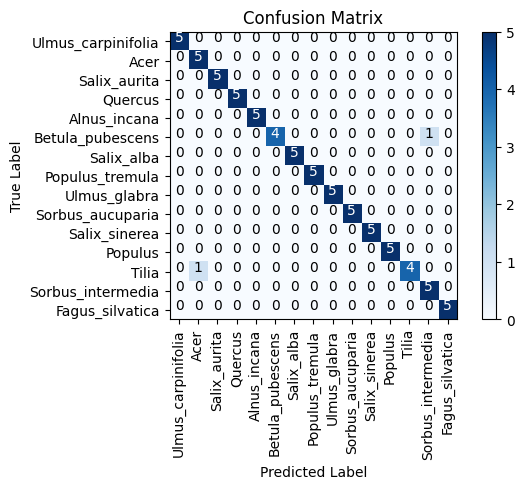

In [255]:
cm_plot_labels = species
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [256]:
print(classification_report(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98   

In [257]:
# Access the loss values from the training history
loss_values = history.history['loss']

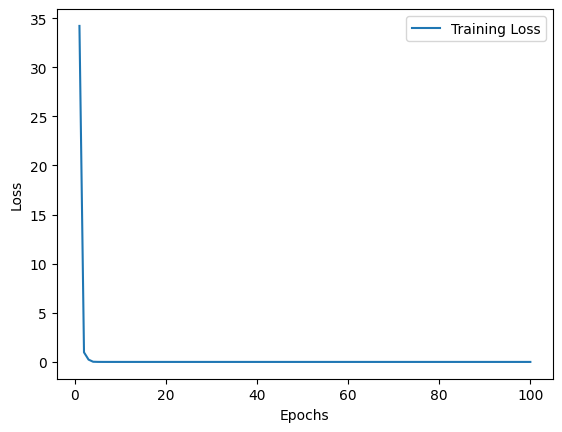

In [260]:
# Plot the loss graph
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [261]:
# Access accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
accuracy

[0.5022222399711609,
 0.855555534362793,
 0.9311110973358154,
 0.9933333396911621,
 0.9988889098167419,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

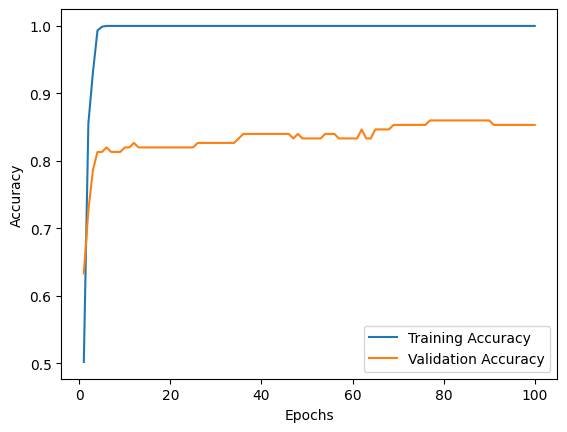

In [262]:
# Plot the accuracy graph
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()